## Load necessary libraries

In [1]:
import numpy as np 
import pandas as pd

# for nlp
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# for stemming
from nltk.stem import PorterStemmer
stemming = PorterStemmer()

# for Lemmatizing
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer 
lemma = WordNetLemmatizer()
lemmatizing = WordNetLemmatizer()
from nltk import FreqDist

import matplotlib.pyplot as plt
import seaborn as sns

### **Read dataset**

In [6]:
df = pd.read_csv('data_cleaned.csv',index_col=[0])
df

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids into d...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause offer wheelchair van...
2,3,0.0,bihday your majesty,bihday majesty
3,4,0.0,#model i love u take with u all the time in ...,#model take
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation
...,...,...,...,...
49154,49155,NaN,thought factory: left-right polarisation! #tru...,thought factory left right polarisation #trump...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...,feeling mermaid #hairflip #neverready #formal ...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...,#hillary #campaigned #ohio used words assets l...
49157,49158,NaN,"happy, at work conference: right mindset leads...",work conference right mindset leads culture de...


## Hashtag analysis

This includes:

    - Extract hashtags
    - Most common hashtags
    - Most common hatred hashtags
    - Most common non-hatred hashtags

**Objective**

Hashtags in twitter are synonymous with the ongoing trends on twitter at any particular point in time. We should try to check whether these hashtags add any value to our sentiment analysis task, i.e., they help in distinguishing tweets into the different sentiments. The tweet seems interesting in nature and the hashtags in the tweet convey the same feeling.

We will store all the trend terms in two separate lists — one for non-racist/sexist tweets and the other for racist/sexist tweets.

**Extract hashtags**

In [8]:
def extract_hashtag(tweet):
    tweets = " ".join(filter(lambda x: x[0]== '#', tweet.split())) #filter those start with (#)
    tweets = re.sub('[^a-zA-Z]',' ',  tweets) #keep only alphabetics
    tweets = tweets.lower() #convert to lowercase
    tweets = [lemma.lemmatize(word) for word in tweets] #do lemmatization to hashtags
    tweets = "".join(tweets) #join tweets
    return tweets

In [9]:
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
df['hashtag'] = df.tweet.apply(extract_hashtag)
df

,id,label,tweet,tidy_tweet,hashtag
0,1,0.0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids into d...,run
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause offer wheelchair van...,lyft disapointed getthanked
2,3,0.0,bihday your majesty,bihday majesty,
3,4,0.0,#model i love u take with u all the time in ...,#model take,model
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation,motivation
...,...,...,...,...,...
49154,49155,NaN,thought factory: left-right polarisation! #tru...,thought factory left right polarisation #trump...,trump uselections leadership politics ...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...,feeling mermaid #hairflip #neverready #formal ...,hairflip neverready formal wedding gown ...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...,#hillary #campaigned #ohio used words assets l...,hillary campaigned ohio omg clinton ra...
49157,49158,NaN,"happy, at work conference: right mindset leads...",work conference right mindset leads culture de...,work mindset


**Most common hashtags**

In [11]:
freq_all_hashtag = FreqDist(list((" ".join(df.hashtag)).split())).most_common(20)
freq_all_hashtag

[('love', 2442),
 ('positive', 1332),
 ('healthy', 904),
 ('smile', 856),
 ('thankful', 724),
 ('fun', 700),
 ('life', 677),
 ('summer', 587),
 ('model', 576),
 ('affirmation', 552),
 ('cute', 543),
 ('fathersday', 543),
 ('blog', 524),
 ('i', 520),
 ('me', 517),
 ('am', 477),
 ('beautiful', 464),
 ('altwaystoheal', 462),
 ('gold', 447),
 ('family', 446)]

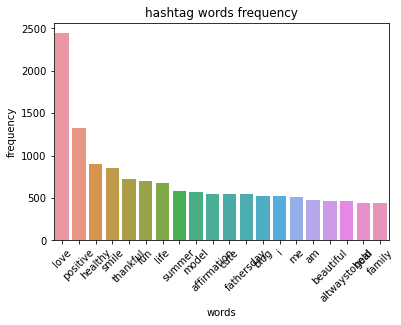

In [12]:
df_allhashtag = pd.DataFrame(freq_all_hashtag, columns=['words', 'frequency'])
sns.barplot(x='words', y='frequency', data=df_allhashtag)
plt.xticks(rotation = 45)
plt.title('hashtag words frequency')
plt.show()

**Most common hatred hashtags**

In [39]:
freq_hatred_hashtag = FreqDist(list((" ".join(df[df['label']==1]['hashtag'])).split())).most_common(20)
freq_hatred_hashtag

[('trump', 134),
 ('politics', 95),
 ('allahsoil', 92),
 ('libtard', 76),
 ('liberal', 75),
 ('sjw', 74),
 ('retweet', 63),
 ('miami', 46),
 ('black', 44),
 ('hate', 32),
 ('tampa', 32),
 ('s', 28),
 ('bigot', 28),
 ('blm', 28),
 ('hispanic', 28),
 ('brexit', 27),
 ('sikh', 27),
 ('calgary', 27),
 ('temple', 26),
 ('wso', 26)]

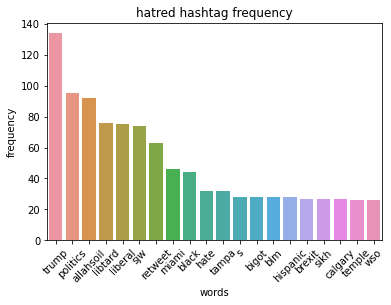

In [40]:
df_hatredhashtag = pd.DataFrame(freq_hatred_hashtag, columns=['words', 'frequency'])
sns.barplot(x='words', y='frequency', data=df_hatredhashtag)
plt.xticks(rotation = 45)
plt.title('hatred hashtag frequency')
plt.show()

**Most common non-hatred hashtags**

In [41]:
# most common non-hatred hashtags
freq_non_hatred_hashtag = FreqDist(list((" ".join(df[df['label']==0]['hashtag'])).split())).most_common(20)
freq_non_hatred_hashtag

[('love', 1580),
 ('positive', 879),
 ('smile', 577),
 ('healthy', 575),
 ('thankful', 471),
 ('fun', 463),
 ('life', 437),
 ('summer', 392),
 ('model', 365),
 ('cute', 364),
 ('affirmation', 363),
 ('blog', 352),
 ('fathersday', 340),
 ('i', 338),
 ('me', 336),
 ('am', 315),
 ('gold', 301),
 ('silver', 300),
 ('altwaystoheal', 295),
 ('beautiful', 290)]

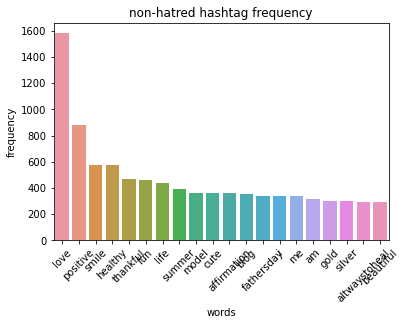

In [42]:
df_non_hatredhashtag = pd.DataFrame(freq_non_hatred_hashtag, columns=['words', 'frequency'])
sns.barplot(x='words', y='frequency', data=df_non_hatredhashtag)
plt.xticks(rotation = 45)
plt.title('non-hatred hashtag frequency')
plt.show()

## Basic features

This includes:

	- Count number of words
	- Count number of characters
	- Average word length
	- Number of stopwords
	- Number of special characters
	- Number of numerics
	- Number of Uppercase words

###  Count number of words

- One of the most basic requirement in NLP analysis is to count the number of words in each tweet. The idea behind this is that **the negative sentiments contain a lesser amount of words than the positive ones**.

- We can accomplish the above task (count the number of words) by using the **split** function in python as follows-

In [43]:
# define word count function
def num_of_words(df):
    df['word_count'] = df['tweet'].apply(lambda x : len(str(x).split(" ")))

In [44]:
# call the function
num_of_words(df)
df

,id,label,tweet,tidy_tweet,tidy_tweet1,hashtag,word_count
0,1,0.0,@user when a father is dysfunctional and is s...,dysfunctional selfish drags kids dysfunction #run,DYSFUNCTIONAL SELFISH DRAGS KIDS DYSFUNCTION #RUN,run,21
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause offer wheelchair van...,THANKS #LYFT CREDIT CAUSE OFFER WHEELCHAIR VAN...,lyft disapointed getthanked,22
2,3,0.0,bihday your majesty,majesty,MAJESTY,,5
3,4,0.0,#model i love u take with u all the time in ...,#model,#MODEL,model,17
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation,FACTSGUIDE SOCIETY #MOTIVATION,motivation,8
...,...,...,...,...,...,...,...
49154,49155,NaN,thought factory: left-right polarisation! #tru...,thought factory left right polarisation #trump...,THOUGHT FACTORY LEFT RIGHT POLARISATION #TRUMP...,trump uselections leadership politics ...,13
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...,feeling mermaid #hairflip #neverready #formal ...,FEELING MERMAID #HAIRFLIP #NEVERREADY #FORMAL ...,hairflip neverready formal wedding gown ...,15
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...,#hillary #campaigned #ohio used words assets l...,#HILLARY #CAMPAIGNED #OHIO USED WORDS ASSETS L...,hillary campaigned ohio omg clinton ra...,20
49157,49158,NaN,"happy, at work conference: right mindset leads...",work conference right mindset leads culture de...,WORK CONFERENCE RIGHT MINDSET LEADS CULTURE DE...,work mindset,15


### Count number of characters

- We can also calculate the number of characters in every tweet. The intuition is same as above.

- This can be accomplised by calculating the length of the tweet as follows -

In [45]:
# build the function
def num_of_characters(df):
    df['char_count'] = df['tweet'].str.len()

In [46]:
# call the function
num_of_characters(df)
df.head()

,id,label,tweet,tidy_tweet,tidy_tweet1,hashtag,word_count,char_count
0,1,0.0,@user when a father is dysfunctional and is s...,dysfunctional selfish drags kids dysfunction #run,DYSFUNCTIONAL SELFISH DRAGS KIDS DYSFUNCTION #RUN,run,21,102
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause offer wheelchair van...,THANKS #LYFT CREDIT CAUSE OFFER WHEELCHAIR VAN...,lyft disapointed getthanked,22,122
2,3,0.0,bihday your majesty,majesty,MAJESTY,,5,21
3,4,0.0,#model i love u take with u all the time in ...,#model,#MODEL,model,17,86
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation,FACTSGUIDE SOCIETY #MOTIVATION,motivation,8,39


- We can see that character counts in every tweet has been calculated above.

- The above calculation will also include the number of spaces, which we can remove, if required.

### Average word length

- There is also another feature which is also important is average word length of each tweet. This feature can help us improve our model.

- Average is found by taking the sum of the length of all the words and divide it by the total length of the tweet.

In [47]:
def avg_word(sentence):
    words = sentence.split()
    average = sum(len(word) for word in words)/len(words)
    return average

In [48]:
def avg_word_length(df):
    df['avg_word'] = df['tweet'].apply(lambda x: avg_word(x))

In [49]:
avg_word_length(df)
df.head()

,id,label,tweet,tidy_tweet,tidy_tweet1,hashtag,word_count,char_count,avg_word
0,1,0.0,@user when a father is dysfunctional and is s...,dysfunctional selfish drags kids dysfunction #run,DYSFUNCTIONAL SELFISH DRAGS KIDS DYSFUNCTION #RUN,run,21,102,4.555556
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause offer wheelchair van...,THANKS #LYFT CREDIT CAUSE OFFER WHEELCHAIR VAN...,lyft disapointed getthanked,22,122,5.315789
2,3,0.0,bihday your majesty,majesty,MAJESTY,,5,21,5.666667
3,4,0.0,#model i love u take with u all the time in ...,#model,#MODEL,model,17,86,4.928571
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation,FACTSGUIDE SOCIETY #MOTIVATION,motivation,8,39,8.000000


### Number of stopwords

In [50]:
stop = stopwords.words('english')
set(stop)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [51]:
# build the function
def stop_words(df):
    df['stopwords'] = df['tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))

In [52]:
# Call the function
stop_words(df)
df.head()

,id,label,tweet,tidy_tweet,tidy_tweet1,hashtag,word_count,char_count,avg_word,stopwords
0,1,0.0,@user when a father is dysfunctional and is s...,dysfunctional selfish drags kids dysfunction #run,DYSFUNCTIONAL SELFISH DRAGS KIDS DYSFUNCTION #RUN,run,21,102,4.555556,10
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause offer wheelchair van...,THANKS #LYFT CREDIT CAUSE OFFER WHEELCHAIR VAN...,lyft disapointed getthanked,22,122,5.315789,5
2,3,0.0,bihday your majesty,majesty,MAJESTY,,5,21,5.666667,1
3,4,0.0,#model i love u take with u all the time in ...,#model,#MODEL,model,17,86,4.928571,5
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation,FACTSGUIDE SOCIETY #MOTIVATION,motivation,8,39,8.000000,1


### 3.5 Number of hashtags

- We want to calculate the number of hashtags in it. It also helps in extracting extra information from our text data.

- Here, we make use of the `starts with` function because hashtags always appear at the beginning of a word.

In [53]:
def hash_tags(df):
    df['hashtags'] = df['tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))

In [54]:
hash_tags(df)
df.head()

,id,label,tweet,tidy_tweet,tidy_tweet1,hashtag,word_count,char_count,avg_word,stopwords,hashtags
0,1,0.0,@user when a father is dysfunctional and is s...,dysfunctional selfish drags kids dysfunction #run,DYSFUNCTIONAL SELFISH DRAGS KIDS DYSFUNCTION #RUN,run,21,102,4.555556,10,1
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause offer wheelchair van...,THANKS #LYFT CREDIT CAUSE OFFER WHEELCHAIR VAN...,lyft disapointed getthanked,22,122,5.315789,5,3
2,3,0.0,bihday your majesty,majesty,MAJESTY,,5,21,5.666667,1,0
3,4,0.0,#model i love u take with u all the time in ...,#model,#MODEL,model,17,86,4.928571,5,1
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation,FACTSGUIDE SOCIETY #MOTIVATION,motivation,8,39,8.000000,1,1


### 3.6 Number of numerics

- We can also find the number of numerics which are present in the tweets. 
- It is a useful feature that should be run while doing similar exercises. 

In [55]:
def num_numerics(df):
    df['numerics'] = df['tweet'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))

In [56]:
num_numerics(df)
df.head()

,id,label,tweet,tidy_tweet,tidy_tweet1,hashtag,word_count,char_count,avg_word,stopwords,hashtags,numerics
0,1,0.0,@user when a father is dysfunctional and is s...,dysfunctional selfish drags kids dysfunction #run,DYSFUNCTIONAL SELFISH DRAGS KIDS DYSFUNCTION #RUN,run,21,102,4.555556,10,1,0
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause offer wheelchair van...,THANKS #LYFT CREDIT CAUSE OFFER WHEELCHAIR VAN...,lyft disapointed getthanked,22,122,5.315789,5,3,0
2,3,0.0,bihday your majesty,majesty,MAJESTY,,5,21,5.666667,1,0,0
3,4,0.0,#model i love u take with u all the time in ...,#model,#MODEL,model,17,86,4.928571,5,1,0
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation,FACTSGUIDE SOCIETY #MOTIVATION,motivation,8,39,8.000000,1,1,0


### Number of Uppercase words

- Sometimes, it is also necessary  to identify UPPERCASE words in a sentence.

In [26]:
def num_uppercase(df):
    df['upper_case'] = df['tweet'].apply(lambda x: len([x for x in x.split() if x.isupper()]))

In [27]:
num_uppercase(df)
df.head()

,id,label,tweet,tidy_tweet,hashtag,word_count,char_count,avg_word,stopwords,hashtags,numerics,upper_case
0,1,0.0,@user when a father is dysfunctional and is s...,dysfunctional selfish drags kids dysfunction #run,run,21,102,4.555556,10,1,0,0
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause offer wheelchair van...,lyft disapointed getthanked,22,122,5.315789,5,3,0,0
2,3,0.0,bihday your majesty,majesty,,5,21,5.666667,1,0,0,0
3,4,0.0,#model i love u take with u all the time in ...,#model,model,17,86,4.928571,5,1,0,0
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation,motivation,8,39,8.000000,1,1,0,0


In [31]:
df.head()

,id,label,tweet,tidy_tweet,hashtag,word_count,char_count,avg_word,stopwords,hashtags,numerics,upper_case
0,1,0.0,@user when a father is dysfunctional and is s...,dysfunctional selfish drags kids dysfunction #run,run,21,102,4.555556,10,1,0,0
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause offer wheelchair van...,lyft disapointed getthanked,22,122,5.315789,5,3,0,0
2,3,0.0,bihday your majesty,majesty,,5,21,5.666667,1,0,0,0
3,4,0.0,#model i love u take with u all the time in ...,#model,model,17,86,4.928571,5,1,0,0
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation,motivation,8,39,8.000000,1,1,0,0


In [ ]:
df.to_csv("C:/Users/lenovo/Desktop/hate_speech_detection/data_analyzed.csv")